<a href="https://colab.research.google.com/github/priyanka2224/Measurement_Tutorial/blob/main/FinalVersion_MeasurementTutorial_PPaul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Measurement Tutorial: SoDA 501 SP25**

In this tutorial we will explore various code examples to undertsand some key aspects on Measurement. The measurement scale used here is the Perceived Discrimination Scale developed by Williams et al. (1997). This scale is used to assess how frequently individuals feel being treated poorly or unfairly due to their race, ethnicity, gender, age, religion, physical appearance, sexual orientation, or other persoanlity traits.

The Midlife in the United States (MIDUS) has retained the original version of this scale without modifcation. MIDUS 3 (cross-sectional data) will be used here for demonstration purposes. Here's the official link of MIDUS for the curious cats: https://www.midus.wisc.edu/

The dataset used in this tutorial is also publicly available on my GitHub and can be easily loaded into a pandas Dataframe. If you use this dataset or any insights from this tutorial in your research, academic work, or publication, please consider citing the appropriate source. Proper citation helps acknowledge the efforts behind data collection and analysis and contributes to academic integrity.

**First Install Packages**

In [ ]:
# Don't run this, it is just for my system--- in case you get path errors feel free to modify the path

import os
import sys

# Define the path to be added
new_path = "/storage/home/pvp5558/.local/bin"

# Check if the path is already in PATH
if new_path not in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + new_path
    sys.path.append(new_path)  # Append for script execution

# Verify if the path has been added
print("Updated PATH:", os.environ["PATH"])

In [ ]:
# Checking as I was still getitng a lot of error

import shutil
print(shutil.which("f2py"))

In [ ]:
# I had to upgrade everything after many trial and error and this worked, don't run this in Roar Collab if you dont get errors

import subprocess

subprocess.run(["pip", "install", "--user", "--force-reinstall", "numpy==1.24.4", "daal4py", "scikit-learn-intelex"])

In [ ]:
# Still debugging

!pip show daal4py

In [ ]:
# Final step of debugging

import importlib.metadata

print("Daal4py version:", importlib.metadata.version("daal4py"))

In [ ]:
!pip install pyreadr # for reading rda file
!pip install missingno # for missing data analysis
!pip install pingouin # for chronbach's alpha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.0/416.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


Now lets import python modules

In [ ]:
import pandas as pd
import pyreadr
import requests
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import pingouin as pg
import seaborn as sns

**Read the Data** from GitHub URL

Reference from where the code below was taken: https://github.com/ofajardo/pyreadr

In [ ]:
#First lets load the .rda file

# If you have the rda file saved in your local machine it's simple as shown in the code below
# midus = pyreadr.read_r('36346-0001-Data.rda')

# But for the ease of this tutorial puprposes we will be using a URL and the code here shows how to do it because we cannot pass an url to pyreadr.read_r

# URL of the file
url = "https://raw.githubusercontent.com/priyanka2224/Measurement_Tutorial/main/36346-0001-Data.rda"

# Download the file
rda_path = "36346-0001-Data.rda"
rda_path_again = pyreadr.download_file(url, rda_path)

# Read the .rda file
midus = pyreadr.read_r(rda_path)


In [ ]:
# Lets check whats inside the file as it has multiple objects in it

# Way 1
midus_loaded = list(midus.keys())

print(midus_loaded)

# or you could simply do

print(midus.keys())

# But wait, this is not giving an output that we are expecting!
# .keys() returns a dictionary-like view of dataset names and list(midus.keys()) converts this into a list.

['da36346.0001']
odict_keys(['da36346.0001'])


In [ ]:
 # Also, lets check if there is even a dataframe in this file

type(midus["da36346.0001"])

pandas.core.frame.DataFrame

In [ ]:
# So whats in the R data file? How to check?
# midus_loaded[0] retrieves the first dataset name from the list

# Way 1

df = midus[midus_loaded[0]]

df.head()

,M2ID,M2FAMNUM,SAMPLMAJ,C1STATUS,M3RE_FILTER,C1PRAGE,C1PBYEAR,C1PRSEX,C1PIDATE_MO,C1PIDATE_YR,...,C1SP4L,C1SP4M,C1SP5,C1SP6,C1SQ1,C1SQ2,C1SQ3,C1SQ4,C1SQ5,C1SQ6
0,10001.0,110498.0,(02) SIBLING,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,69.0,1943.0,(1) MALE,7.0,(2013) 2013,...,NaN,NaN,NaN,NaN,8.0,6.0,8.0,8.0,8.0,8.0
1,10002.0,100001.0,(01) MAIN RDD,(1) COMPLETED M3 CATI ONLY,(0) M3 SAMPLE,78.0,1935.0,(1) MALE,6.0,(2013) 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011.0,110475.0,(02) SIBLING,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,61.0,1952.0,(2) FEMALE,6.0,(2013) 2013,...,(1) YES,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,9.0,4.0,9.0,10.0,10.0,4.0
3,10015.0,120805.0,(03) TWIN,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,63.0,1950.0,(2) FEMALE,11.0,(2013) 2013,...,(2) NO,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,7.0,5.0,9.0,8.0,8.0,9.0
4,10019.0,100009.0,(01) MAIN RDD,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,60.0,1952.0,(1) MALE,6.0,(2013) 2013,...,(2) NO,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,8.0,8.0,7.0,5.0,7.0,6.0


In [ ]:
# Way 2: extract the object directly as a Pandas dataframe

dfpd= midus["da36346.0001"]
dfpd.head()

,M2ID,M2FAMNUM,SAMPLMAJ,C1STATUS,M3RE_FILTER,C1PRAGE,C1PBYEAR,C1PRSEX,C1PIDATE_MO,C1PIDATE_YR,...,C1SP4L,C1SP4M,C1SP5,C1SP6,C1SQ1,C1SQ2,C1SQ3,C1SQ4,C1SQ5,C1SQ6
0,10001.0,110498.0,(02) SIBLING,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,69.0,1943.0,(1) MALE,7.0,(2013) 2013,...,NaN,NaN,NaN,NaN,8.0,6.0,8.0,8.0,8.0,8.0
1,10002.0,100001.0,(01) MAIN RDD,(1) COMPLETED M3 CATI ONLY,(0) M3 SAMPLE,78.0,1935.0,(1) MALE,6.0,(2013) 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011.0,110475.0,(02) SIBLING,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,61.0,1952.0,(2) FEMALE,6.0,(2013) 2013,...,(1) YES,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,9.0,4.0,9.0,10.0,10.0,4.0
3,10015.0,120805.0,(03) TWIN,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,63.0,1950.0,(2) FEMALE,11.0,(2013) 2013,...,(2) NO,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,7.0,5.0,9.0,8.0,8.0,9.0
4,10019.0,100009.0,(01) MAIN RDD,(4) COMPLETED M3 CATI AND SAQ PART 1 AND 2,(0) M3 SAMPLE,60.0,1952.0,(1) MALE,6.0,(2013) 2013,...,(2) NO,(2) NO,(4) NOT AT ALL,(4) NOT AT ALL,8.0,8.0,7.0,5.0,7.0,6.0


We will need to access the MIDUS 3 codebook to understand what each the variables mean and what variables do we exactly require. Here I have provided the **codes required to subset the items of the perceived discrimination scale and other demographic features needed**

M2ID :MIDUS 2 ID number

C1PRAGE : Respondent's calculated age at MIDUS 3 Project 1 phone interview

C1PRSEX : Respondent's sex; 1: male, 2: female

C1PB19 : Marital status currently; 1: married, 2: separated, 3: divorced, 4: widowed, 5: never married ; 7: don't know, 8: refused

**PERCEIVED DISCRIMINATION SCALE**

**C1SLFEDI: Life Discrimination Subscale**

Score ranges from 0-11 since there are 11 items, "The scale is a count of the type of discrimination experienced across the 11 items". Here, -1 means respondent does not have SAQ data, 98 means missing data

**Items** ["Each item is answered by frequency (number of times) of its happening"]

C1SP1A: Higher education discouraged (times/ count)

C1SP1B: Denied scholarship
(times)

C1SP1C: Not hired for a job (times)

C1SP1D: Not given job promotion
(times)

C1SP1E: Fired (times)

C1SP1F: Prevented from rent/buying home (times)

C1SP1G: Prevented remain in neighborhood (times)

C1SP1H: Hassled by police
(times)

C1SP1I: Denied a bank loan (times)

C1SP1J: Denied or provided inferior
medical care (times)

C1SP1K: Denied or provided inferior service (times)

**C1SDAYDI: Daily Discrimination Subscale**

"The scale is constructed by calculating the sum
of the values of the items. Items were reverse-coded so that high scores reflect
higher standing in the scale"

**Items**

[1: often, 2: sometimes, 3: rarely, 4: never ; -1: respondent does not
have SAQ data, 8: refused]

C1SP2A: Treated with less courtesy than others (frequency)

C1SP2B: Treated with
less respect than others (frequency)

C1SP2C: Receive poorer service than others
(frequency)

C1SP2D: People think you are not smart (frequency)

C1SP2E: People
act afraid of you (frequency)

C1SP2F: People think you are dishonest (frequency)

C1SP2G: People think you not as good as they are (frequency)

C1SP2H: Called
names or insulted (frequency)

C1SP2I: Threatened/harassed (frequency)

98 and -1 means Missing Data for Daily Discrimination items


In [ ]:
# Let's look at only the desired columns mentioned above

desired_columns = [
    'M2ID', 'C1PRAGE', 'C1PRSEX', 'C1PB19', 'C1SLFEDI', 'C1SP1A', 'C1SP1B', 'C1SP1C', 'C1SP1D', 'C1SP1E', 'C1SP1F',
    'C1SP1G', 'C1SP1H', 'C1SP1I', 'C1SP1J', 'C1SP1K', 'C1SDAYDI', 'C1SP2A', 'C1SP2B', 'C1SP2C', 'C1SP2D',
    'C1SP2E', 'C1SP2F', 'C1SP2G', 'C1SP2H', 'C1SP2I']

# Extract the desired_columns to a new dataframe
existing_columns = [col for col in desired_columns if col in df.columns]

# Select only the existing columns and save it in df_required
df_required = df[existing_columns]

# Print and check
df_required.head()


,M2ID,C1PRAGE,C1PRSEX,C1PB19,C1SLFEDI,C1SP1A,C1SP1B,C1SP1C,C1SP1D,C1SP1E,...,C1SDAYDI,C1SP2A,C1SP2B,C1SP2C,C1SP2D,C1SP2E,C1SP2F,C1SP2G,C1SP2H,C1SP2I
0,10001.0,69.0,(1) MALE,(3) DIVORCED,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER
1,10002.0,78.0,(1) MALE,(1) MARRIED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011.0,61.0,(2) FEMALE,(3) DIVORCED,1.0,2.0,0.0,0.0,0.0,0.0,...,15.0,(3) RARELY,(3) RARELY,(4) NEVER,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(4) NEVER
3,10015.0,63.0,(2) FEMALE,(1) MARRIED,2.0,0.0,0.0,1.0,1.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
4,10019.0,60.0,(1) MALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(2) SOMETIMES,(3) RARELY,(3) RARELY


In [ ]:
# Let me rename the columns for my convenience {}--- key value, it becomes a pyhton dictionary ()--- tuple and []--- pyhton list

df_required = df_required.rename(columns={
    'M2ID': 'id',
    'C1PRAGE': 'age',
    'C1PRSEX': 'sex',
    'C1PB19': 'marital',
    'C1SLFEDI': 'life.dis',
    'C1SP1A': 'lifdis.a',
    'C1SP1B': 'lifdis.b',
    'C1SP1C': 'lifdis.c',
    'C1SP1D': 'lifdis.d',
    'C1SP1E': 'lifdis.e',
    'C1SP1F': 'lifdis.f',
    'C1SP1G': 'lifdis.g',
    'C1SP1H': 'lifdis.h',
    'C1SP1I': 'lifdis.i',
    'C1SP1J': 'lifdis.j',
    'C1SP1K': 'lifdis.k',
    'C1SDAYDI': 'daily.dis',
    'C1SP2A': 'dlydis.a',
    'C1SP2B': 'dlydis.b',
    'C1SP2C': 'dlydis.c',
    'C1SP2D': 'dlydis.d',
    'C1SP2E': 'dlydis.e',
    'C1SP2F': 'dlydis.f',
    'C1SP2G': 'dlydis.g',
    'C1SP2H': 'dlydis.h',
    'C1SP2I': 'dlydis.i'})

# Print and check
df_required.head()


,id,age,sex,marital,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,...,daily.dis,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i
0,10001.0,69.0,(1) MALE,(3) DIVORCED,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER
1,10002.0,78.0,(1) MALE,(1) MARRIED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011.0,61.0,(2) FEMALE,(3) DIVORCED,1.0,2.0,0.0,0.0,0.0,0.0,...,15.0,(3) RARELY,(3) RARELY,(4) NEVER,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(4) NEVER
3,10015.0,63.0,(2) FEMALE,(1) MARRIED,2.0,0.0,0.0,1.0,1.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
4,10019.0,60.0,(1) MALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(2) SOMETIMES,(3) RARELY,(3) RARELY


**Missingness**

We can infer that there is missing data from the codebook and also from the code block above. The next few codeblocks will walk through how to check for missing values numerically and visually.  I have saved missing data imputation for the end of the tutorial—because we love desserts, and why not? While FIML handles missingness like a pro, a little extra sweetness never hurts!

In [ ]:
# Checking for missing values

missing_values = df_required.isnull()

missing_values #does not help me

,id,age,sex,marital,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,...,daily.dis,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3291,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3292,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking for non-missing values using notnull()

non_missing_values = df_required.notnull()

non_missing_values # cool but difficult to interpret if we have a massive dataset

,id,age,sex,marital,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,...,daily.dis,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3290,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3291,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3292,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Checking random 10 data to see any missing values: exploring codes

df_required.sample(10)

,id,age,sex,marital,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,...,daily.dis,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i
2450,16845.0,54.0,(2) FEMALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,(4) NEVER,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER
1087,13051.0,73.0,(2) FEMALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
962,12678.0,48.0,(2) FEMALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER
3264,19123.0,66.0,(2) FEMALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
475,11346.0,62.0,(1) MALE,(1) MARRIED,1.0,0.0,0.0,0.0,1.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
1145,13199.0,62.0,(2) FEMALE,(1) MARRIED,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER
2466,16896.0,47.0,(2) FEMALE,(1) MARRIED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,10670.0,55.0,(1) MALE,(1) MARRIED,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER
730,12044.0,74.0,(2) FEMALE,(1) MARRIED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,15676.0,59.0,(2) FEMALE,(1) MARRIED,4.0,1.0,0.0,2.0,0.0,0.0,...,18.0,(2) SOMETIMES,(2) SOMETIMES,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(3) RARELY,(3) RARELY,(4) NEVER


In [ ]:
# Check is there any missing values across each column: This is not terrible but not very informative either

df_required.isnull().any()

,0
id,False
age,False
sex,False
marital,True
life.dis,True
lifdis.a,True
lifdis.b,True
lifdis.c,True
lifdis.d,True
lifdis.e,True


In [ ]:
# Count of or Summary of missing values of each column: this gives a fair idea of missingness!

df_required.isna().sum()


,0
id,0
age,0
sex,0
marital,4
life.dis,508
lifdis.a,560
lifdis.b,573
lifdis.c,560
lifdis.d,562
lifdis.e,561


In [ ]:
# Count total missing values in the entire dataset

print(df_required.isnull().values.sum())

11220


<Axes: >

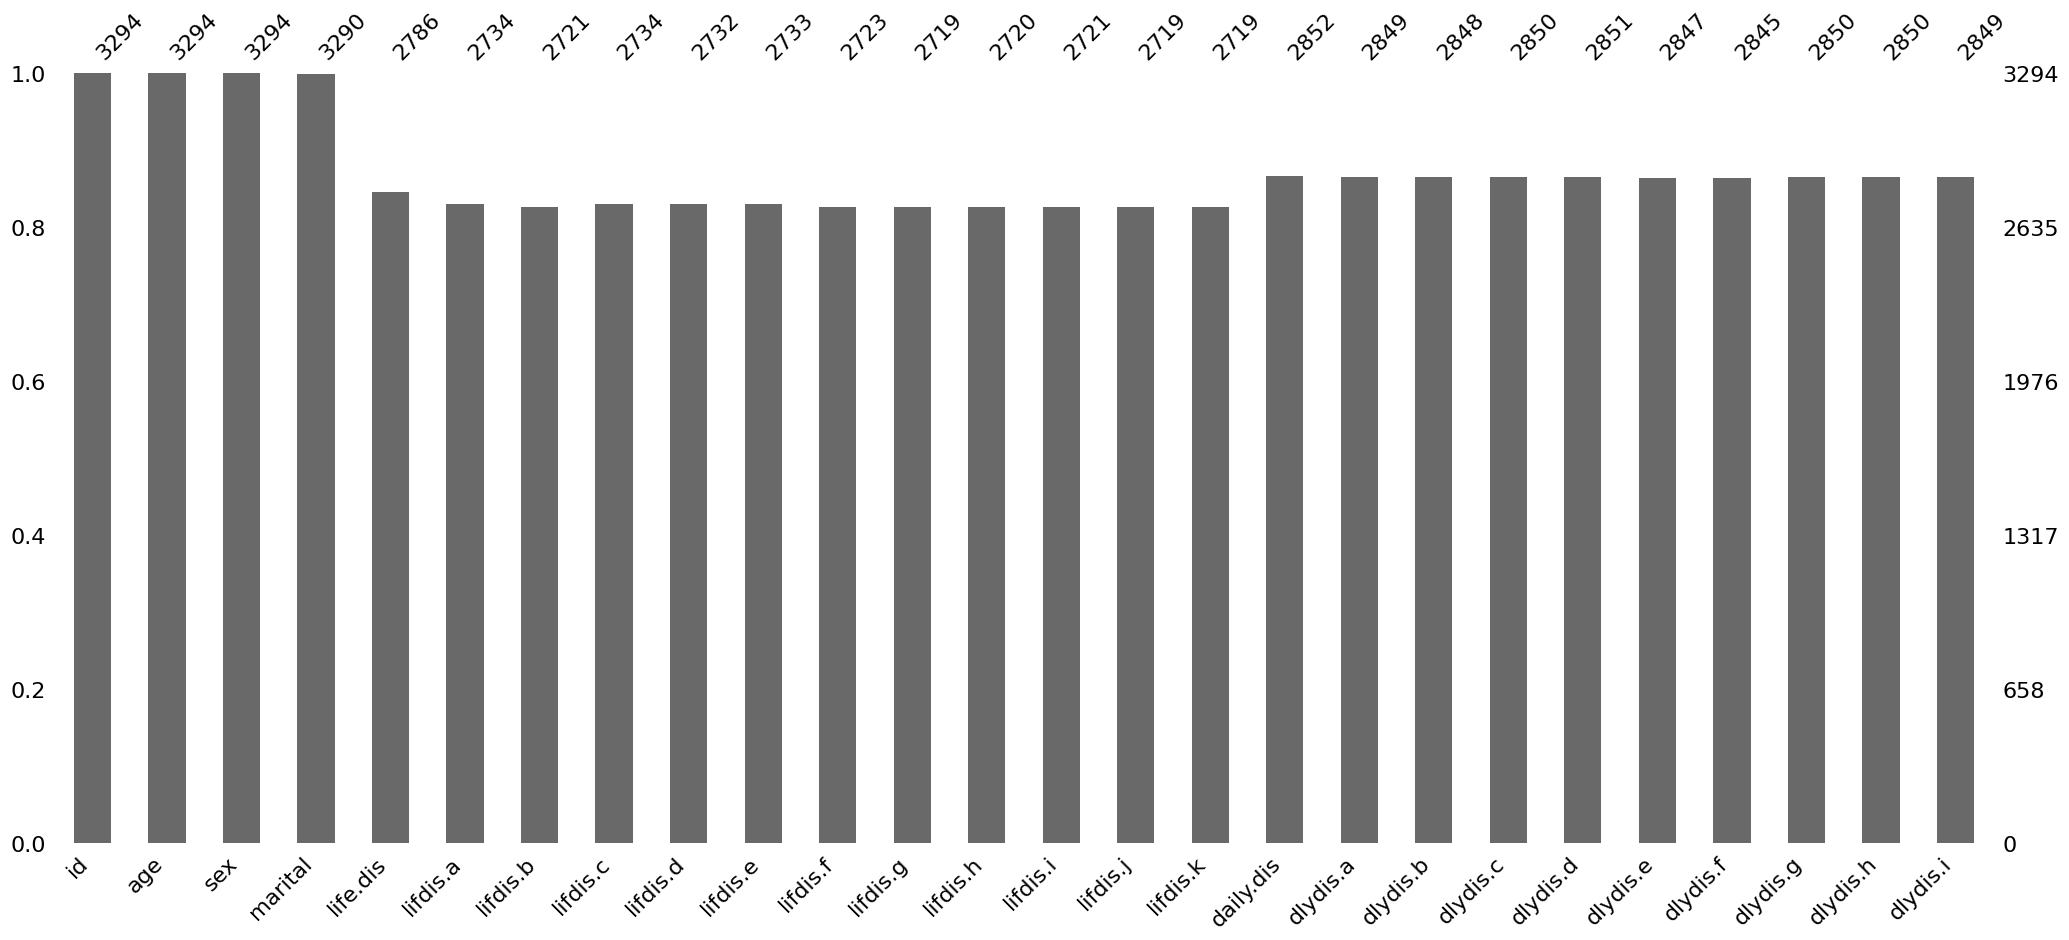

In [ ]:
# Bar Plot showing missingness

msno.bar(df_required)

<Axes: >

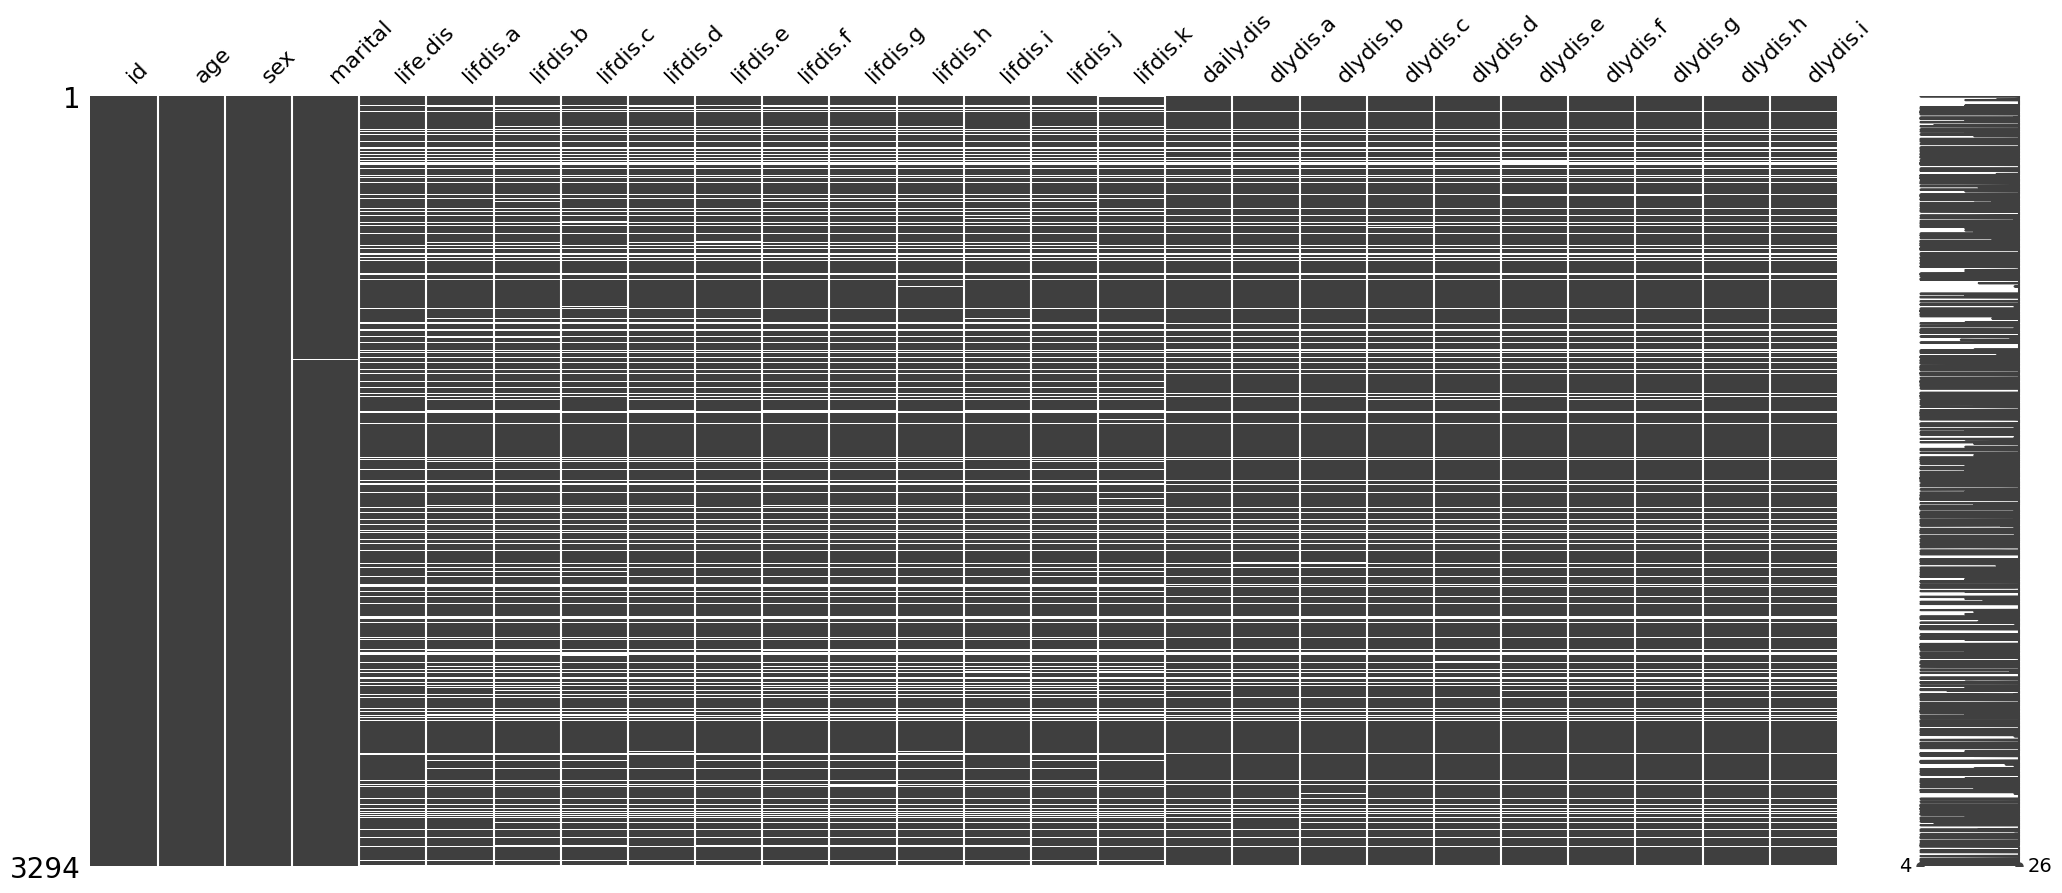

In [ ]:
# Matrix chart showing missingness

msno.matrix(df_required)

<Axes: >

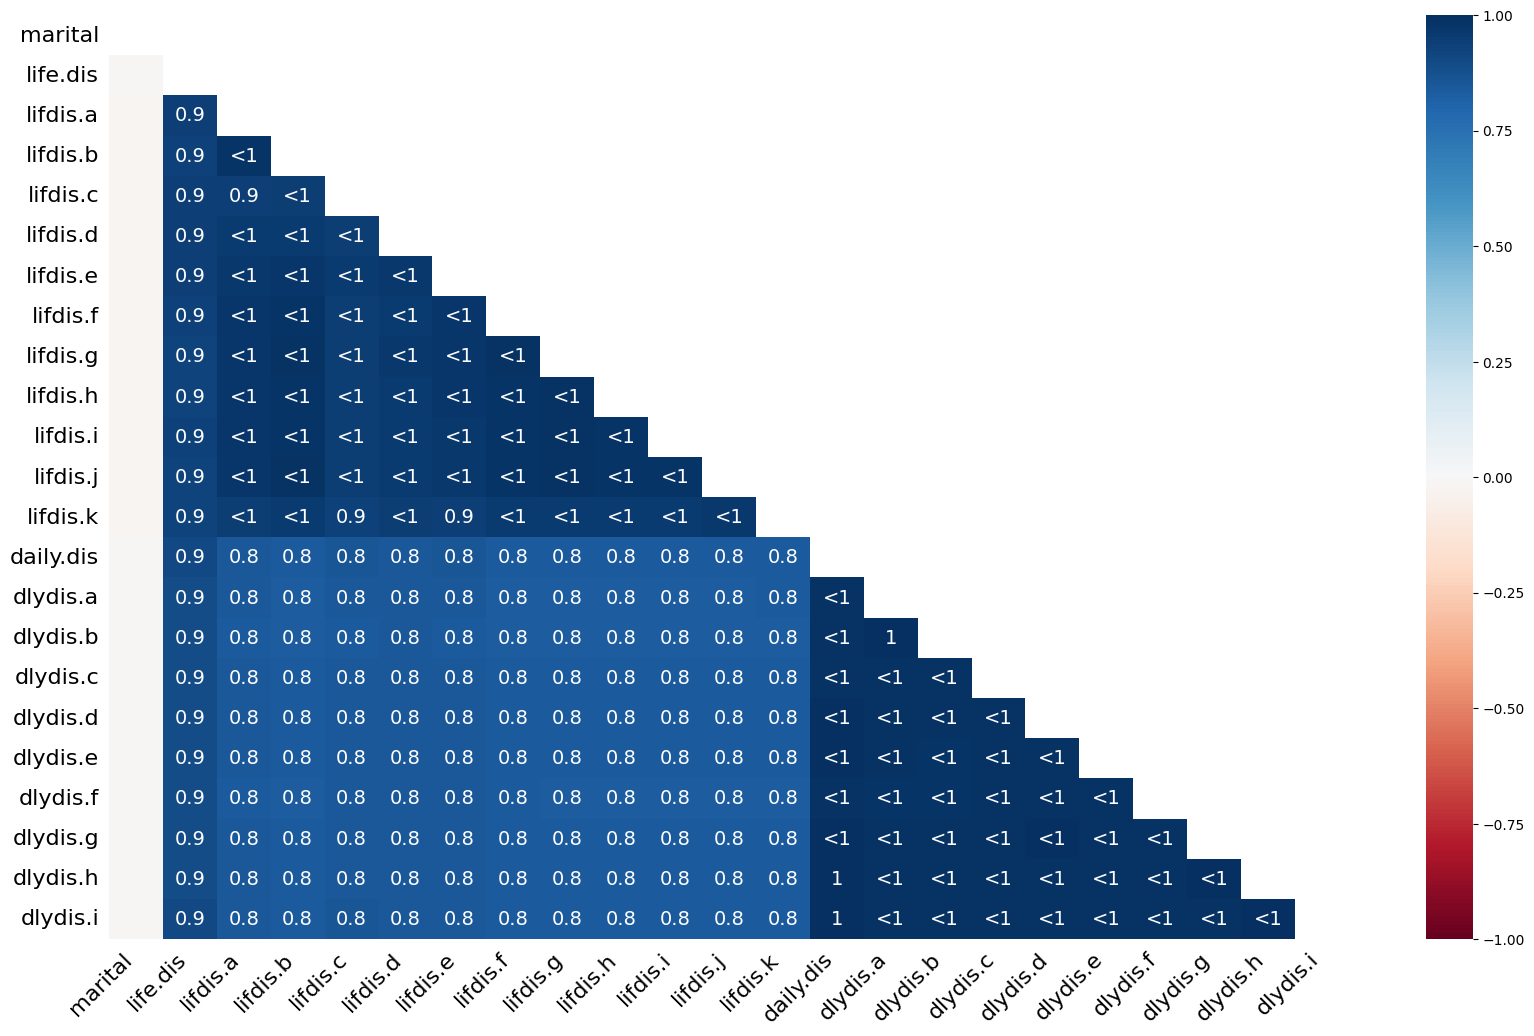

In [ ]:
# Heatmap showing correlation of missingness

msno.heatmap(df_required)

# A value close to 1 indicates a strong positive correlation, meaning that if one column has a missing value, the other column is very likely to have a missing value as well.
# A value close to -1 indicates a strong negative correlation, meaning that if one column has a missing value, the other column is very unlikely to have a missing value.
# A value close to 0 indicates little to no correlation between the missingness of the two columns.



It is also interesting to note that in the descriptive stats (below) we dont have daily discriminaton items in the output. Can you think why?

In [ ]:
# Descriptive Statistics

df_required.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3294.0,14605.821494,2658.038400,10001.0,12300.5,14625.5,16901.5,19193.0
age,3294.0,63.641166,11.349777,39.0,55.0,63.0,72.0,93.0
life.dis,2786.0,0.866116,1.477669,0.0,0.0,0.0,1.0,11.0
lifdis.a,2734.0,0.204462,1.018078,0.0,0.0,0.0,0.0,20.0
lifdis.b,2721.0,0.082323,0.906991,0.0,0.0,0.0,0.0,35.0
lifdis.c,2734.0,0.724579,5.263270,0.0,0.0,0.0,0.0,200.0
lifdis.d,2732.0,0.326501,1.370928,0.0,0.0,0.0,0.0,50.0
lifdis.e,2733.0,0.153677,0.599980,0.0,0.0,0.0,0.0,10.0
lifdis.f,2723.0,0.077855,1.938956,0.0,0.0,0.0,0.0,100.0
lifdis.g,2719.0,0.016182,0.152593,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Let's check the structure of this dataset--- this leads to our answer if you felt anything weird was happening above.

df_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3294 non-null   float64 
 1   age        3294 non-null   float64 
 2   sex        3294 non-null   category
 3   marital    3290 non-null   category
 4   life.dis   2786 non-null   float64 
 5   lifdis.a   2734 non-null   float64 
 6   lifdis.b   2721 non-null   float64 
 7   lifdis.c   2734 non-null   float64 
 8   lifdis.d   2732 non-null   float64 
 9   lifdis.e   2733 non-null   float64 
 10  lifdis.f   2723 non-null   float64 
 11  lifdis.g   2719 non-null   float64 
 12  lifdis.h   2720 non-null   float64 
 13  lifdis.i   2721 non-null   float64 
 14  lifdis.j   2719 non-null   float64 
 15  lifdis.k   2719 non-null   float64 
 16  daily.dis  2852 non-null   float64 
 17  dlydis.a   2849 non-null   category
 18  dlydis.b   2848 non-null   category
 19  dlydis.c   2850 non-null   

In [ ]:
# Convert all categorical columns to numerical
df_required = df_required.apply(lambda col: col.cat.codes if col.dtype.name == 'category' else col)

In [ ]:
# Lets export this file to a csv
df_required.to_csv("perceiveddiscrimination_midus.csv", index=False)

In [ ]:
# This is how we can downlaod the file
from google.colab import files
files.download("perceiveddiscrimination_midus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Let us save some computing time by using the curated file I have already uploaded. The same items from df_required are present, but I have renamed them for convenience. Having some extra codes is always handy!**

In [ ]:
# Read CSV file from the GitHub URL
csv_url = "https://raw.githubusercontent.com/priyanka2224/Measurement_Tutorial/main/perceiveddiscrimination_midus.csv"

# Read the CSV file (this is simpler than reading a .rda)
df_final = pd.read_csv(csv_url)

# Print and check
df_final.head()


,id,age,sex,marital,pd1,pd2,pd3,pd4,pd5,pd6,...,pd13,pd14,pd15,pd16,pd17,pd18,pd19,pd20,life.dis,daily.dis
0,10001,69,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,0.0,11.0
1,10002,78,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011,61,2,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,15.0
3,10015,63,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,9.0
4,10019,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,0.0,19.0


In [ ]:
# Reverse coding for columns 16 to 24--- 0-index

reverse_cols = df_final.columns[15:24]
df_final[reverse_cols] = 5 - df_final[reverse_cols]

df_final.head()

,id,age,sex,marital,pd1,pd2,pd3,pd4,pd5,pd6,...,pd13,pd14,pd15,pd16,pd17,pd18,pd19,pd20,life.dis,daily.dis
0,10001,69,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,11.0
1,10002,78,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10011,61,2,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,15.0
3,10015,63,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9.0
4,10019,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,0.0,19.0


In [ ]:
# Descriptive Statistics

df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3294.0,14605.821494,2658.038400,10001.0,12300.5,14625.5,16901.5,19193.0
age,3294.0,63.641166,11.349777,39.0,55.0,63.0,72.0,93.0
sex,3294.0,1.549484,0.497621,1.0,1.0,2.0,2.0,2.0
marital,3290.0,1.892097,1.366842,1.0,1.0,1.0,3.0,5.0
pd1,2734.0,0.204462,1.018078,0.0,0.0,0.0,0.0,20.0
pd2,2721.0,0.082323,0.906991,0.0,0.0,0.0,0.0,35.0
pd3,2734.0,0.724579,5.263270,0.0,0.0,0.0,0.0,200.0
pd4,2732.0,0.326501,1.370928,0.0,0.0,0.0,0.0,50.0
pd5,2733.0,0.153677,0.599980,0.0,0.0,0.0,0.0,10.0
pd6,2723.0,0.077855,1.938956,0.0,0.0,0.0,0.0,100.0


**For the love of Figures and Plots**

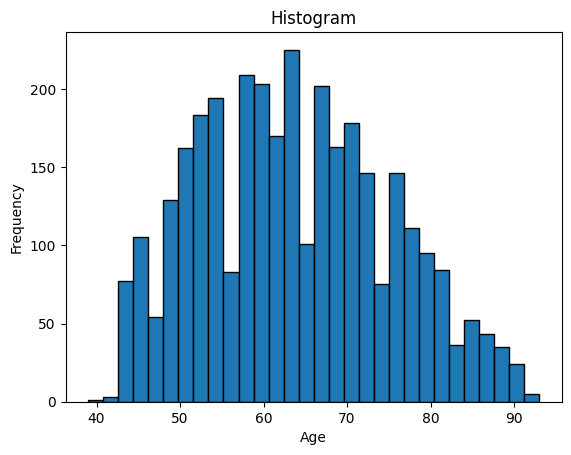

In [ ]:
# How is AGE distributed?

# Histogram
plt.hist(df_final['age'], bins=30, edgecolor='black')

# Add a title and labels
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show the plot
plt.show()


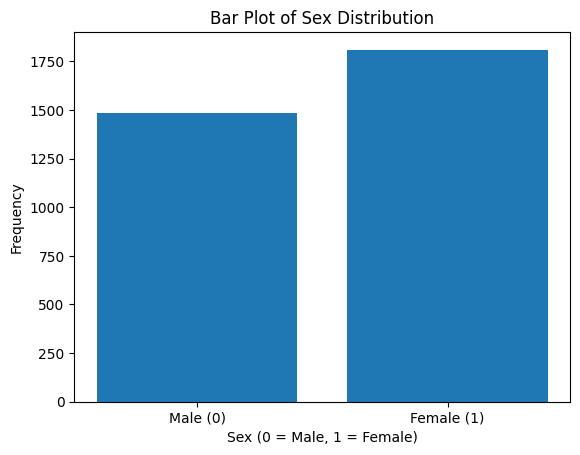

In [ ]:
# What about SEX?

# Recode 'sex' column (1 -> 0, 2 -> 1)
df_final['sex'] = df_final['sex'].replace({1: 0, 2: 1})

# Bar plot
plt.bar(df_final['sex'].value_counts().index, df_final['sex'].value_counts().values)

# Add labels and title
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Frequency")
plt.title("Bar Plot of Sex Distribution")

# Set x-axis tick labels for clarity
plt.xticks([0, 1], ["Male (0)", "Female (1)"])

# Show plot
plt.show()


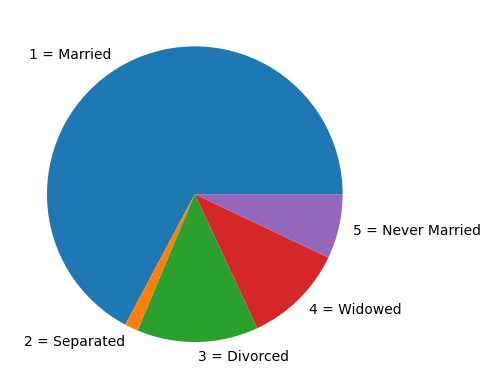

In [ ]:
# MARITAL STATUS: Pie Chart

# Count occurrences of each marital status
marital_status_counts = df_final['marital'].value_counts().sort_index()

# Define category labels
labels = ["1 = Married", "2 = Separated", "3 = Divorced", "4 = Widowed", "5 = Never Married"]

# If you want to create bar plot
# plt.bar(marital_status_counts.index, marital_status_counts.values, tick_label=[1, 2, 3, 4, 5])

plt.pie(marital_status_counts, labels = labels)
plt.show()

The purpose of the code block below is to visualize the skewed pattern of the data for the first 11 items of this scale. All the 11 items are heavily skewed to the left that is, majority of the participants have responsed 0 to this item. The visualziation itself suggests that if we don't **bin the data** and proceed with our further analysis, we might not get favorable results cause of the zero-infaltion.

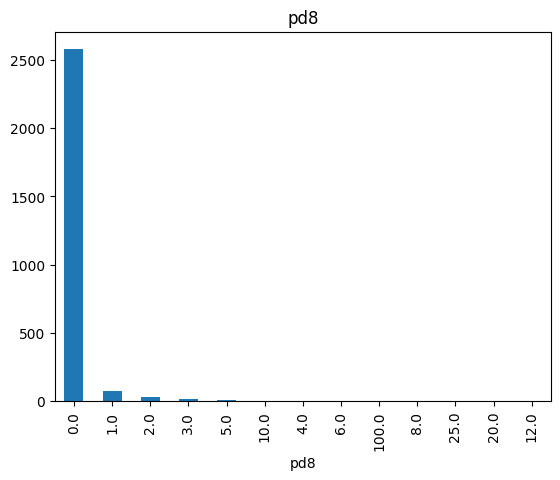

In [ ]:
# Select columns 5 to 15 (life discrimination items)
selected_columns = df_final.iloc[:, 4:15]

# Plot
selected_columns['pd8'].value_counts().plot(kind='bar') # instead of pd11 try inserting anything between pd1 to pd11 and see the pattern yourself
plt.title('pd8')
plt.show()

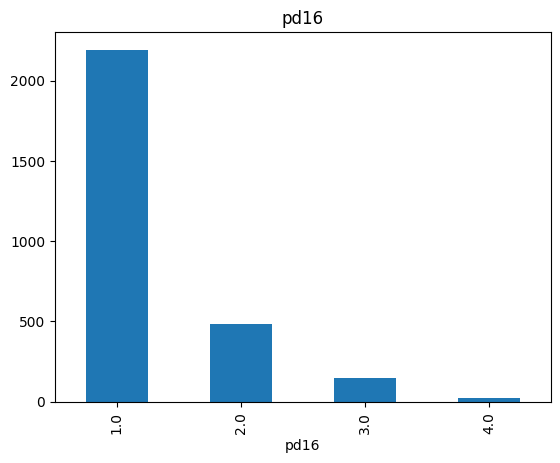

In [ ]:
# Select columns 16 to 24 (daily discrimination items)
selected_columnsagain = df_final.iloc[:, 15:24]

# Plot
selected_columnsagain['pd16'].value_counts().plot(kind='bar') # instead of pd16 try inserting anything between pd12 to pd20 and see the pattern yourself
plt.title('pd16')
plt.show()

In [ ]:
# Lets do some BINNING. Again remember python index is 0-based

# A function will be needed here to apply the binning logic

def binning(x):
  if pd.isna(x):
    return np.nan # Handle missing data
  elif x == 0:
    return 0      # Bin 0 for 0
  elif x == 1:
    return 1      # Bin 1 for 1
  elif 2 <= x <= 10:
    return 2      # Bin 2 for values between 2 and 10
  else:
    return 3      # Bin 3 for values greater than equal to 10

# Apply binning to columns 5 to 15
df_binned = df_final.iloc[:, 4:15].apply(lambda col: col.map(binning))

# Rename the columns by adding 'b' as a prefix to the original column names suggesting these are binned
df_binned.columns = ['b' + col for col in df_binned.columns]

# Print and check
df_binned.head()


,bpd1,bpd2,bpd3,bpd4,bpd5,bpd6,bpd7,bpd8,bpd9,bpd10,bpd11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Lets insert the binned columns after column 15 for synchrony [this is more like a c-bind in R]
df_final = pd.concat([df_final.iloc[:, :15], df_binned, df_final.iloc[:, 15:]], axis=1)

# Print and check
df_final.iloc[:, 10:28].head()

,pd7,pd8,pd9,pd10,pd11,bpd1,bpd2,bpd3,bpd4,bpd5,bpd6,bpd7,bpd8,bpd9,bpd10,bpd11,pd12,pd13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3294.0,14605.821494,2658.038400,10001.0,12300.5,14625.5,16901.5,19193.0
age,3294.0,63.641166,11.349777,39.0,55.0,63.0,72.0,93.0
sex,3294.0,0.549484,0.497621,0.0,0.0,1.0,1.0,1.0
marital,3290.0,1.892097,1.366842,1.0,1.0,1.0,3.0,5.0
pd1,2734.0,0.204462,1.018078,0.0,0.0,0.0,0.0,20.0
pd2,2721.0,0.082323,0.906991,0.0,0.0,0.0,0.0,35.0
pd3,2734.0,0.724579,5.263270,0.0,0.0,0.0,0.0,200.0
pd4,2732.0,0.326501,1.370928,0.0,0.0,0.0,0.0,50.0
pd5,2733.0,0.153677,0.599980,0.0,0.0,0.0,0.0,10.0
pd6,2723.0,0.077855,1.938956,0.0,0.0,0.0,0.0,100.0


In [ ]:
# Chronbach's alpha for lifetime subscale items

lifeitems = df_final.iloc[:, 15:26]
cronbach_alpha = pg.cronbach_alpha(data=lifeitems, ci = .99)
print(cronbach_alpha)

(0.7382913265350397, array([0.72 , 0.755]))


In [ ]:
# Chronbach's alpha for daily discrimination subscale items

dailyitems = df_final.iloc[:, 26:35]
cronbach_alphaa = pg.cronbach_alpha(data=dailyitems, ci = .99)
print(cronbach_alphaa)

(0.9166887734704146, array([0.911, 0.922]))


In [ ]:
# Chronbach's alpha for all the 20 items in the scale

allitems = df_final.iloc[:, 15:35]
cronbach_alphaall = pg.cronbach_alpha(data=allitems, ci = .99)
print(cronbach_alphaall)

(0.8877454234596378, array([0.88 , 0.895]))


In [ ]:
# Calculate correlation matrix
corr_matrix = df_final.iloc[:, 15:35].corr()
# print(corr_matrix) #print it if you like, did not help me much here

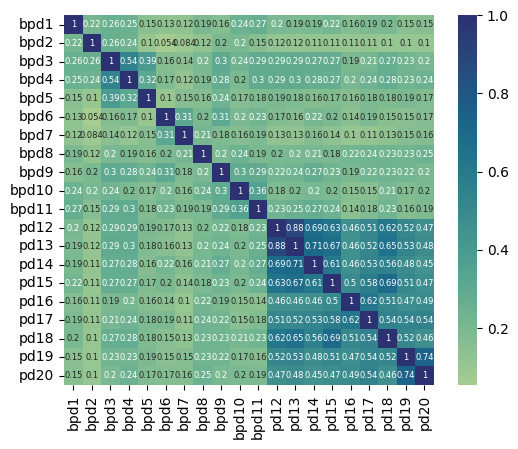

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [ ]:
# Heatmap of correlation
sns.heatmap(corr_matrix, cmap="crest", square= True, annot= True, annot_kws={"size": 6})
plt.show()
plt.figure(figsize=(50, 50))

In an Ideal Situation we need to do Polychoric Correaltion and not Pearson like I have done here. This needs to be followed by PCA, doing a Scree Plot, EFA and CFA. In short Factor Analysis. Given the time constraints of this tutorial, I have cut some slack and attached a link where you can read all about Correlation and it even comes with pyhton code! Wohooo!

https://python.plainenglish.io/compute-correlation-coefficient-5be1fa20d7f5

Now, let's skip the extra computing and go straight to **MISSING DATA ANALYSIS**

Reference for imputation: https://github.com/kshedden/mice_workshop/blob/master/nhanes_imputation.ipynb


In [ ]:
!pip install statsmodels scikit-learn pandas numpy

In [ ]:
import statsmodels.api as sm
from statsmodels.imputation.mice import MICEData


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Selecting specific columns (column 3 and columns 15 to 35) from df_final
df_impute = df_final.iloc[:, [3] + list(range(15, 35))].copy()

# Initialize MICE on the selected columns
mice_data = MICEData(df_impute)

# Run multiple imputation with 10 iterations
mice_data.update_all(n_iter=10)

In [ ]:
# Get the final imputed DataFrame
df_imputed = mice_data.data.copy()

# Check for remaining missing values
print(df_imputed.isnull().sum())


marital    0
bpd1       0
bpd2       0
bpd3       0
bpd4       0
bpd5       0
bpd6       0
bpd7       0
bpd8       0
bpd9       0
bpd10      0
bpd11      0
pd12       0
pd13       0
pd14       0
pd15       0
pd16       0
pd17       0
pd18       0
pd19       0
pd20       0
dtype: int64


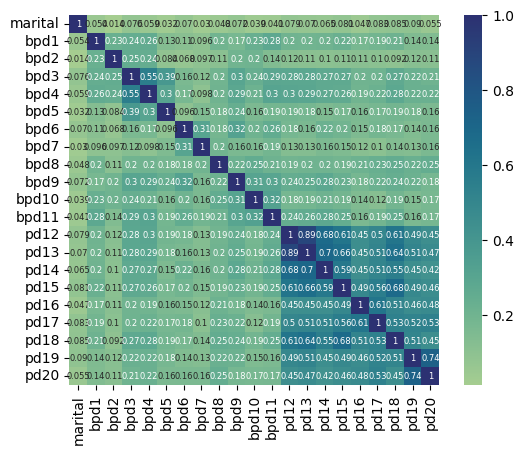

<Figure size 6000x6000 with 0 Axes>

<Figure size 6000x6000 with 0 Axes>

In [ ]:
# Does anything change in the correlation matrix?

corr_matrixx = df_imputed.corr()
sns.heatmap(corr_matrixx, cmap="crest", square= True, annot=True, annot_kws={"size": 6})
plt.show()
plt.figure(figsize=(60, 60))

**PCA and Scree Plot**

1. First I attempt to do PCA on df_final with misisng data and using PCA

2. Then I show doing missing data analysis using MICE and then PCA on this imputed dataset
Reference: https://sanchitamangale12.medium.com/scree-plot-733ed72c8608and

3. I again show PCA using statsmodels.multivaiate.pca as it does No.2 in one step. Here's the reference:
https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html#statsmodels.multivariate.pca.PCA

Let's do Principal Component Analysis and see what the scree plot tells us for both 2 & 3.


In [ ]:
# (1) What if I don't use the imputed data? Cause fa() in R handles missing data pretty well with FIML. NUMERIC** missing data analysis is a must here**
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pcaa_fit = pca.fit(df_final)

eigenvaluess = pcaa_fit.explained_variance_
print(eigenvaluess)

plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.decomposition import PCA

# (2) PCA with imputed data

# Lets drop marital column from df_imputed casue I imputed every column with missing data)
df_imputed = df_imputed.drop('marital', axis=1)

# Using sklearn for PCA
pca = PCA(n_components=20)
pca_fit = pca.fit(df_imputed)

# Rubins rules equations to combine all of them in MICE (5 IS MINIMUM)

In [ ]:
# Extract Eigen Values
eigenvalues = pca_fit.explained_variance_
print(eigenvalues)

[2.41070672 0.58889126 0.33805034 0.28031603 0.2521807  0.19963917
 0.17830043 0.17615506 0.16270433 0.1472897  0.14024621 0.12009551
 0.10786206 0.10218692 0.07287411 0.06335546 0.05926243 0.05424197
 0.04367279 0.01625856]


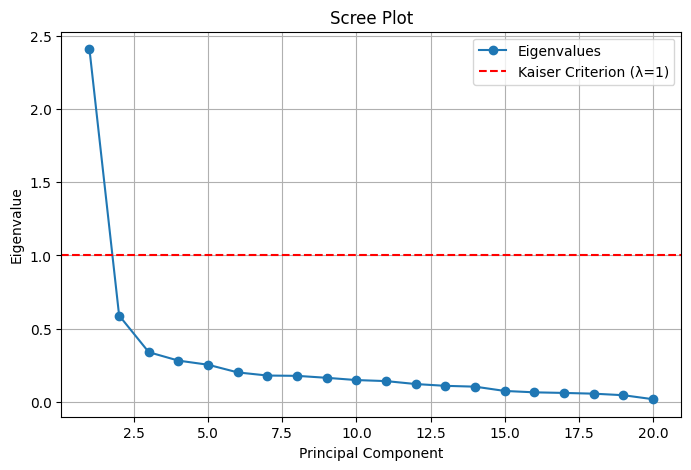

In [ ]:
# Create a Scree Plot-- measure of the variance carried by each of the components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-", label="Eigenvalues")
plt.axhline(y=1, color="r", linestyle="--", label="Kaiser Criterion (λ=1)")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.legend()
plt.grid()


plt.show()


In [ ]:
!pip install --upgrade statsmodels

In [ ]:
from statsmodels.multivariate.pca import PCA

# (3) using fill-em

# Apply PCA directly on df_final with missing data
pca_model = PCA(df_final, ncomp= 4, method = 'svd', missing='fill-em')

# Print PCA results
print(pca_model.factors)
print(pca_model.eigenvals)
# expectation maximization algorithm

        comp_0    comp_1    comp_2    comp_3
0     0.007637  0.003397 -0.000609  0.003199
1     0.040607  0.025271  0.056279  0.047864
2    -0.008540 -0.004380  0.000068  0.004819
3     0.007537 -0.005770  0.010258 -0.005447
4    -0.011838  0.006680 -0.018979  0.003844
...        ...       ...       ...       ...
3289  0.012152 -0.000341 -0.000647  0.002888
3290 -0.003166  0.008917 -0.002394 -0.006124
3291 -0.015884  0.037199 -0.055566 -0.056308
3292  0.011670 -0.001557 -0.000156 -0.000943
3293  0.012098 -0.000437 -0.000662  0.002931

[3294 rows x 4 columns]
0    29915.380193
1    17564.682665
2    16651.140958
3    12720.067278
Name: eigenvals, dtype: float64


In [ ]:
# Minimum non-null values in any column
min_non_missing_col = df_final.notnull().sum().min()

# Minimum non-null values in any row
min_non_missing_row = df_final.notnull().sum(axis=1).min()

print(f"Minimum non-missing values in any column: {min_non_missing_col}")
print(f"Minimum non-missing values in any row: {min_non_missing_row}")


Minimum non-missing values in any column: 2719
Minimum non-missing values in any row: 4


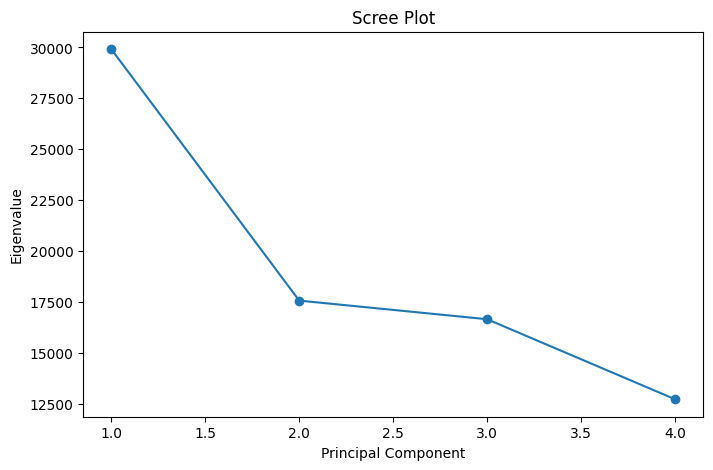

In [ ]:
# Create a Scree Plot again and see if there's any difference

# Extract the Eigen values
eigenvalues = pca_model.eigenvals

# Create a Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-")

# Labels
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")

# Show the plot
plt.show()

# If this chunk does not run and gives you errors, try the codeblock below--- that should work

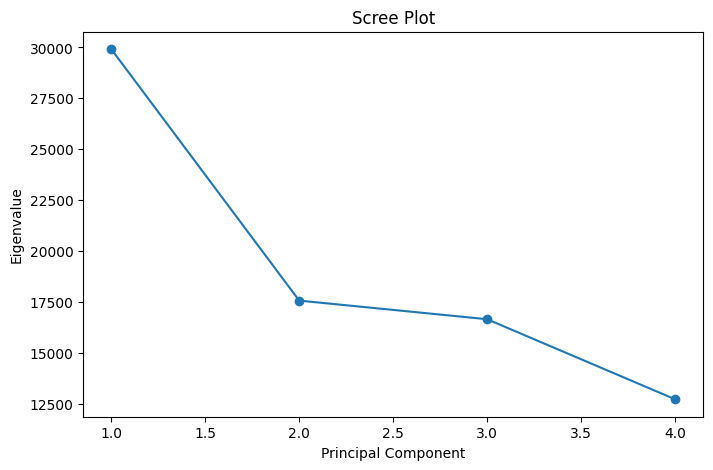

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure eigenvalues is a NumPy array [this is where the problem is]
eigenvalues = np.array(eigenvalues)

# Create a Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-")

# Labels
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()


**Factor Analysis**

I did not like the output interface here, probably Iam positvely biased towards R for Factor Analysis at least.The problem I faced is that I could not understand anyhting from the output here, so, we can end here I guess... but the codes are provided for the curious cats.

**Thank You!**

In [ ]:
!pip install factor_analyzer

  Using cached factor_analyzer-0.5.1.tar.gz (42 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=177eb5c21ec9597d401ce1fc2629ba88d26685e54457f05cfdcae8069a02f4d9
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

# We want 2 factors as decided from the scree plot
fa = FactorAnalyzer(n_factors= 2, rotation="promax", method='ml')

# Fit the model to the data
fa.fit(df_imputed)

# Print the factor loadings
loadings = fa.loadings_
print(loadings)

[[ 0.02912331  0.3855752 ]
 [-0.06551099  0.37104725]
 [ 0.02296105  0.56698052]
 [ 0.05093922  0.53276353]
 [-0.01526181  0.4287277 ]
 [ 0.00280691  0.38131502]
 [-0.00893069  0.3149313 ]
 [ 0.02314424  0.41224853]
 [ 0.02695719  0.49548232]
 [-0.03765875  0.47578891]
 [ 0.03905523  0.47227421]
 [ 1.05641644 -0.25412247]
 [ 1.08330817 -0.26258062]
 [ 0.7699888  -0.01300567]
 [ 0.7032634   0.06006336]
 [ 0.46403634  0.16629334]
 [ 0.5315824   0.15548735]
 [ 0.68368982  0.08076175]
 [ 0.52146848  0.15148262]
 [ 0.44936245  0.20081258]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Extract Communalities
communalities = fa.get_communalities()

print(communalities)

[0.1495164  0.14196775 0.32199412 0.28643179 0.18404036 0.14540902
 0.09926148 0.1704845  0.24622942 0.22779327 0.22456824 1.18059392
 1.24250517 0.5930519  0.49818701 0.2429832  0.30675616 0.47395423
 0.29487636 0.24225231]
